In [1]:
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rc("axes",labelsize="large")

plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 600

import matplotlib as mpl

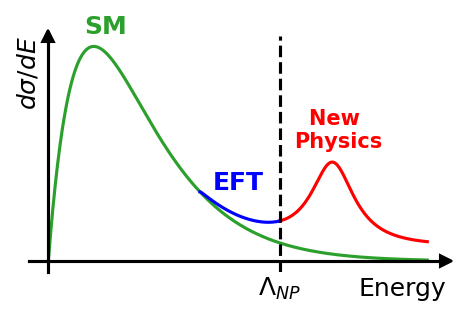

In [38]:
mu, sigma = 0.75, 0.04 # mean and standard deviation

energy = np.linspace(0., 1., 1001)
SM_scale = 1.
NP_scale = 0.08
Lambda_NP = 0.61

SM_sample = SM_scale * stats.gamma.pdf(energy, a=2., scale=0.12)

# NP_sample = NP_scale * stats.norm.pdf(energy, mu, sigma)
NP_sample = NP_scale * 3.3*(stats.cauchy.pdf(energy, loc=mu, scale=0.07) - stats.cauchy.pdf(0.4, loc=mu, scale=0.07))

# Slight shift upwards for the NP sample
def np_contribution(energy):
    scale = 0.4
    if energy < scale:
        np_dsigma = 0
    else: 
        np_dsigma = 0.3*(energy - scale)**0.6
    return np_dsigma

NP_sample = NP_sample + np.array([np_contribution(e) for e in energy])

NP_sample = NP_sample + SM_sample
# NP_sample = NP_sample + 0.1*stats.norm.pdf(energy, mu, 0.15)

fig, ax = plt.subplots(figsize=(3., 2.), constrained_layout=True)

ax.spines[["left", "bottom"]].set_position(("data", 0))
ax.spines[["top", "right"]].set_visible(False)
ax.spines["left"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

plt.plot(energy[int(Lambda_NP*1000) :], NP_sample[int(Lambda_NP*1000) :], color='red', )
plt.plot(energy, SM_sample, color='tab:green', )
plt.plot(energy[400: int(Lambda_NP*1000)], NP_sample[400: int(Lambda_NP*1000)], color='blue', )

plt.axvline(x=Lambda_NP, color='black', linestyle='--')

ax.get_xaxis().set_ticks([Lambda_NP])
ax.set_xticklabels([r"$\Lambda_{NP}$"], fontsize=12)
ax.get_yaxis().set_ticks([])

ax.set_xlabel(r'Energy', loc='right', labelpad=-12)
ax.set_ylabel(r'$d\sigma / dE$', loc='top')

# print(mpl.font_manager.get_font_names())
ax.text(0.74, 0.6, "New \nPhysics", color="red",ha='center', va='center', 
        transform=ax.transAxes, weight="heavy",)
ax.text(0.15, 3.35, "SM", color="tab:green",ha='center', va='center', weight="heavy", fontsize=12)
ax.text(0.5, 0.38, "EFT", color="blue",ha='center', va='center', 
        transform=ax.transAxes, weight="heavy", fontsize=12)
plt.savefig("eft_illustration.pdf")
plt.savefig("eft_illustration.png")
plt.show()